<a href="https://colab.research.google.com/github/Si-Mun/Machine-Learning/blob/main/Build%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Preprocess Data

In [ ]:
from tensorflow.keras.optimizers import RMSprop
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
!gdown 1tpvQ4P3t0MWGUr43Kq3B397zvC8mxU63

Downloading...
From: https://drive.google.com/uc?id=1tpvQ4P3t0MWGUr43Kq3B397zvC8mxU63
To: /content/photos_batch2.zip
100% 452M/452M [00:09<00:00, 47.9MB/s]


In [ ]:
!gdown 1OEF0KJoBXJdQNP_SPBAnHW_xfh8rvv5-

Downloading...
From: https://drive.google.com/uc?id=1OEF0KJoBXJdQNP_SPBAnHW_xfh8rvv5-
To: /content/Salinan photos_revised.zip
100% 410M/410M [00:08<00:00, 51.0MB/s]


In [ ]:
local_zip = '/content/Salinan photos_revised.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
local_zip = '/content/photos_batch2.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
path_ori = '/tmp/photos'

In [ ]:
source_path_cap = os.path.join(path_ori, 'cap')
source_path_cookset = os.path.join(path_ori, 'cooking set hike')
source_path_medis = os.path.join(path_ori, 'first aid kit')
source_path_topi = os.path.join(path_ori, 'hat')
source_path_headlamp = os.path.join(path_ori, 'headlamp climbing')
source_path_pisau = os.path.join(path_ori, 'knife')
source_path_jashujan = os.path.join(path_ori, 'raincoat')
source_path_pole = os.path.join(path_ori, 'trekking pole')
source_path_flashlight = os.path.join(path_ori, 'flashlight')
source_path_jacket = os.path.join(path_ori, 'jackets')
source_path_backpack = os.path.join(path_ori, 'carrier bag')
source_path_matras = os.path.join(path_ori, 'matras camping')
source_path_sandal = os.path.join(path_ori, 'outdoors sandals')
source_path_gas = os.path.join(path_ori, 'portable gas')
source_path_stove = os.path.join(path_ori, 'portable stove')
source_path_shoes = os.path.join(path_ori, 'shoes')
source_path_sleep = os.path.join(path_ori, 'sleeping bag')
source_path_trousers = os.path.join(path_ori, 'trousers')

In [ ]:
print(f"There are {len(os.listdir(source_path_pole))} images of Tracking Pole.")
print(f"There are {len(os.listdir(source_path_gelas))} images of Gelas Plastik.")

There are 430 images of Tracking Pole.
There are 512 images of Gelas Plastik.


In [ ]:
root_dir = '/tmp/capstone'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """

  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  rootie = os.makedirs(root_path)
  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(train_dir)
  os.makedirs(validation_dir)
  train_cookset_dir = os.path.join(train_dir, 'cooking set hike')
  train_aidkit_dir = os.path.join(train_dir, 'first aid kit')
  train_hat_dir = os.path.join(train_dir, 'hat')
  train_headlamp_dir = os.path.join(train_dir, 'headlamp climbing')
  train_knife_dir = os.path.join(train_dir, 'knife')
  train_raincoat_dir = os.path.join(train_dir, 'raincoat')
  train_pole_dir = os.path.join(train_dir, 'trekking pole')
  train_flash_dir = os.path.join(train_dir, 'flashlight')
  train_jacket_dir = os.path.join(train_dir, 'jaket')
  train_backpack_dir = os.path.join(train_dir, 'carrier bag')
  train_matras_dir = os.path.join(train_dir, 'matras camping')
  train_sandal_dir = os.path.join(train_dir, 'outdoor footwear')
  train_stove_dir = os.path.join(train_dir, 'portable stove')
  train_sleep_dir = os.path.join(train_dir, 'sleeping bag')
  train_trousers_dir = os.path.join(train_dir, 'trousers')
  os.makedirs(train_flash_dir)
  os.makedirs(train_jacket_dir)
  os.makedirs(train_backpack_dir)
  os.makedirs(train_matras_dir)
  os.makedirs(train_sandal_dir)
  os.makedirs(train_stove_dir)
  os.makedirs(train_sleep_dir)
  os.makedirs(train_trousers_dir)
  os.makedirs(train_aidkit_dir)
  os.makedirs(train_cookset_dir)
  os.makedirs(train_hat_dir)
  os.makedirs(train_headlamp_dir)
  os.makedirs(train_knife_dir)
  os.makedirs(train_pole_dir)
  os.makedirs(train_raincoat_dir)
  #Directory with validation hike equipment pictures
  val_cookset_dir = os.path.join(validation_dir, 'cooking set hike')
  val_aidkit_dir = os.path.join(validation_dir, 'first aid kit')
  val_hat_dir = os.path.join(validation_dir, 'hat')
  val_headlamp_dir = os.path.join(validation_dir, 'headlamp climbing')
  val_knife_dir = os.path.join(validation_dir, 'knife')
  val_raincoat_dir = os.path.join(validation_dir, 'raincoat')
  val_pole_dir = os.path.join(validation_dir, 'trekking pole')
  validation_flash_dir = os.path.join(validation_dir, 'flashlight')
  validation_jacket_dir = os.path.join(validation_dir, 'jaket')
  validation_backpack_dir = os.path.join(validation_dir, 'carrier bag')
  validation_matras_dir = os.path.join(validation_dir, 'matras camping')
  validation_footwear_dir = os.path.join(validation_dir, 'outdoor footwear')
  validation_stove_dir = os.path.join(validation_dir, 'portable stove')
  validation_sleep_dir = os.path.join(validation_dir, 'sleeping bag')
  validation_trousers_dir = os.path.join(validation_dir, 'trousers')
  os.makedirs(validation_flash_dir)
  os.makedirs(validation_jacket_dir)
  os.makedirs(validation_backpack_dir)
  os.makedirs(validation_matras_dir)
  os.makedirs(validation_footwear_dir)
  os.makedirs(validation_stove_dir)
  os.makedirs(validation_sleep_dir)
  os.makedirs(validation_trousers_dir)
  os.makedirs(val_aidkit_dir)
  os.makedirs(val_cookset_dir)
  os.makedirs(val_hat_dir)
  os.makedirs(val_headlamp_dir)
  os.makedirs(val_knife_dir)
  os.makedirs(val_pole_dir)
  os.makedirs(val_raincoat_dir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/capstone/validation
/tmp/capstone/training
/tmp/capstone/validation/jaket
/tmp/capstone/validation/trash bag
/tmp/capstone/validation/cap
/tmp/capstone/validation/gelas plastik
/tmp/capstone/validation/matras camping
/tmp/capstone/validation/sleeping bag
/tmp/capstone/validation/trousers
/tmp/capstone/validation/first aid kit
/tmp/capstone/validation/outdoor sandals
/tmp/capstone/validation/socks
/tmp/capstone/validation/carrier bag
/tmp/capstone/validation/tent bag
/tmp/capstone/validation/powerbank
/tmp/capstone/validation/botol air
/tmp/capstone/validation/hat
/tmp/capstone/validation/t-shirt
/tmp/capstone/validation/lampu tenda
/tmp/capstone/validation/flashlight
/tmp/capstone/validation/towel
/tmp/capstone/validation/headlamp climbing
/tmp/capstone/validation/cooking set hike
/tmp/capstone/validation/portable gas
/tmp/capstone/validation/raincoat
/tmp/capstone/validation/knife
/tmp/capstone/validation/sarung tangan
/tmp/capstone/validation/baterai
/tmp/capstone/validation/tre

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """
  ### START CODE HERE
  allFileNames = os.listdir(SOURCE_DIR)
  valdiFile=[]
  for i in allFileNames:
    sizem = os.path.getsize(os.path.join(SOURCE_DIR, i))
    if sizem > 0:
      valdiFile.append(i)
    else:
      print("filename is zero length, so ignoring.")
  testi=random.sample(valdiFile, len(valdiFile))
  split = int(SPLIT_SIZE * len(valdiFile))
  trains = testi[:split]
  valids= testi[split:]
  for file_name in trains:
    copyfile(os.path.join(SOURCE_DIR, file_name), os.path.join(TRAINING_DIR, file_name))
  for file_name in valids:
    copyfile(os.path.join(SOURCE_DIR, file_name), os.path.join(VALIDATION_DIR, file_name))

In [ ]:
cdir=os.listdir(path_ori)
for i in cdir:
    #print(len(os.listdir(path_ori+'//'+i)))
    print(f"There are {len(os.listdir(path_ori+'//'+i))} images of {i} for training")

There are 521 images of outdoors sandals for training
There are 301 images of trash bag for training
There are 179 images of cap for training
There are 512 images of gelas plastik for training
There are 536 images of matras camping for training
There are 1221 images of sleeping bag for training
There are 536 images of trousers for training
There are 260 images of first aid kit for training
There are 271 images of socks for training
There are 238 images of carrier bag for training
There are 284 images of tent bag for training
There are 644 images of powerbank for training
There are 1298 images of botol air for training
There are 571 images of batu baterai for training
There are 167 images of hat for training
There are 486 images of jackets for training
There are 537 images of t-shirt for training
There are 636 images of lampu tenda for training
There are 651 images of flashlight for training
There are 231 images of towel for training
There are 379 images of headlamp climbing for trainin

In [ ]:
CAP_SOURCE_DIR ='/tmp/photos/cap'
COOK_SOURCE_DIR ='/tmp/photos/cooking set hike'
AIDKIT_SOURCE_DIR ='/tmp/photos/first aid kit'
HAT_SOURCE_DIR ='/tmp/photos/hat'
HEADLAMP_SOURCE_DIR ='/tmp/photos/headlamp climbing'
KNIFE_SOURCE_DIR ='/tmp/photos/knife'
RAIN_SOURCE_DIR ='/tmp/photos/raincoat'
POLE_SOURCE_DIR ='/tmp/photos/trekking pole'
FLASH_SOURCE_DIR ='/tmp/photos/flashlight'
JACKET_SOURCE_DIR ='/tmp/photos/jackets'
BACKPACK_SOURCE_DIR ='/tmp/photos/carrier bag'
MATRAS_SOURCE_DIR ='/tmp/photos/matras camping'
SANDAL_SOURCE_DIR ='/tmp/photos/outdoors sandals'
GAS_SOURCE_DIR ='/tmp/photos/portable gas'
STOVE_SOURCE_DIR ='/tmp/photos/portable stove'
SHOES_SOURCE_DIR ='/tmp/photos/shoes'
SLEEP_SOURCE_DIR ='/tmp/photos/sleeping bag'
TROUSERS_SOURCE_DIR ='/tmp/photos/trousers'

TRAINING_DIR = '/tmp/capstone/training'
VALIDATION_DIR = '/tmp/capstone/validation'

TRAINING_COOK_DIR = os.path.join(TRAINING_DIR, "cooking set hike/")
VALIDATION_COOK_DIR = os.path.join(VALIDATION_DIR, "cooking set hike/")

TRAINING_AIDKIT_DIR = os.path.join(TRAINING_DIR, "first aid kit/")
VALIDATION_AIDKIT_DIR = os.path.join(VALIDATION_DIR, "first aid kit/")

TRAINING_HAT_dir = os.path.join(TRAINING_DIR, 'hat/')
VALIDATION_HAT_dir = os.path.join(VALIDATION_DIR, 'hat/')

TRAINING_HEADLAMP_dir = os.path.join(TRAINING_DIR, 'headlamp climbing/')
VALIDATION_HEADLAMP_dir = os.path.join(VALIDATION_DIR, 'headlamp climbing/')

TRAINING_KNIFE_dir = os.path.join(TRAINING_DIR, 'knife/')
VALIDATION_KNIFE_dir = os.path.join(VALIDATION_DIR, 'knife/')

TRAINING_RAIN_dir = os.path.join(TRAINING_DIR, 'raincoat/')
VALIDATION_RAIN_dir = os.path.join(VALIDATION_DIR, 'raincoat/')

TRAINING_POLE_dir = os.path.join(TRAINING_DIR, 'trekking pole/')
VALIDATION_POLE_dir = os.path.join(VALIDATION_DIR, 'trekking pole/')

TRAINING_FLASHS_DIR = os.path.join(TRAINING_DIR, "flashlight/")
VALIDATION_FLASHS_DIR = os.path.join(VALIDATION_DIR, "flashlight/")

TRAINING_JACKET_DIR = os.path.join(TRAINING_DIR, "jaket/")
VALIDATION_JACKET_DIR = os.path.join(VALIDATION_DIR, "jaket/")

TRAINING_backpack_dir = os.path.join(TRAINING_DIR, 'carrier bag/')
VALIDATION_backpack_dir = os.path.join(VALIDATION_DIR, 'carrier bag/')

TRAINING_matras_dir = os.path.join(TRAINING_DIR, 'matras camping/')
VALIDATION_matras_dir = os.path.join(VALIDATION_DIR, 'matras camping/')

TRAINING_sandal_dir = os.path.join(TRAINING_DIR, 'outdoor footwear/')
VALIDATION_sandal_dir = os.path.join(VALIDATION_DIR, 'outdoor footwear/')

TRAINING_stove_dir = os.path.join(TRAINING_DIR, 'portable stove/')
VALIDATION_stove_dir = os.path.join(VALIDATION_DIR, 'portable stove/')

TRAINING_sleep_dir = os.path.join(TRAINING_DIR, 'sleeping bag/')
VALIDATION_sleep_dir = os.path.join(VALIDATION_DIR, 'sleeping bag/')

TRAINING_trousers_dir = os.path.join(TRAINING_DIR, 'trousers/')
VALIDATION_trousers_dir = os.path.join(VALIDATION_DIR, 'trousers/')

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_COOK_DIR)) > 0:
  for file in os.scandir(TRAINING_COOK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_AIDKIT_DIR)) > 0:
  for file in os.scandir(TRAINING_AIDKIT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_HAT_dir)) > 0:
  for file in os.scandir(TRAINING_HAT_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_HEADLAMP_dir)) > 0:
  for file in os.scandir(TRAINING_HEADLAMP_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_KNIFE_dir)) > 0:
  for file in os.scandir(TRAINING_KNIFE_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_RAIN_dir)) > 0:
  for file in os.scandir(TRAINING_RAIN_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_POLE_dir)) > 0:
  for file in os.scandir(TRAINING_POLE_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_FLASHS_DIR)) > 0:
  for file in os.scandir(TRAINING_FLASHS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_JACKET_DIR)) > 0:
  for file in os.scandir(TRAINING_JACKET_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_backpack_dir)) > 0:
  for file in os.scandir(TRAINING_backpack_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_matras_dir)) > 0:
  for file in os.scandir(TRAINING_matras_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_sandal_dir)) > 0:
  for file in os.scandir(TRAINING_sandal_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_sleep_dir)) > 0:
  for file in os.scandir(TRAINING_sleep_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_trousers_dir)) > 0:
  for file in os.scandir(TRAINING_trousers_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_stove_dir)) > 0:
  for file in os.scandir(TRAINING_stove_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_COOK_DIR)) > 0:
  for file in os.scandir(VALIDATION_COOK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_AIDKIT_DIR)) > 0:
  for file in os.scandir(VALIDATION_AIDKIT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_HAT_dir)) > 0:
  for file in os.scandir(VALIDATION_HAT_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_HEADLAMP_dir)) > 0:
  for file in os.scandir(VALIDATION_HEADLAMP_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KNIFE_dir)) > 0:
  for file in os.scandir(VALIDATION_KNIFE_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_RAIN_dir)) > 0:
  for file in os.scandir(VALIDATION_RAIN_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_POLE_dir)) > 0:
  for file in os.scandir(VALIDATION_POLE_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FLASHS_DIR)) > 0:
  for file in os.scandir(VALIDATION_FLASHS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_JACKET_DIR)) > 0:
  for file in os.scandir(VALIDATION_JACKET_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_backpack_dir)) > 0:
  for file in os.scandir(VALIDATION_backpack_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_matras_dir)) > 0:
  for file in os.scandir(VALIDATION_matras_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sandal_dir)) > 0:
  for file in os.scandir(VALIDATION_sandal_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_stove_dir)) > 0:
  for file in os.scandir(VALIDATION_stove_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sleep_dir)) > 0:
  for file in os.scandir(VALIDATION_sleep_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_trousers_dir)) > 0:
  for file in os.scandir(VALIDATION_trousers_dir):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
# split_data(BATERAI_SOURCE_DIR, TRAINING_BATERAI_DIR, VALIDATION_BATERAI_DIR, split_size)
split_data(CAP_SOURCE_DIR, TRAINING_HAT_dir, VALIDATION_HAT_dir, split_size)
split_data(COOK_SOURCE_DIR, TRAINING_COOK_DIR, VALIDATION_COOK_DIR, split_size)
split_data(AIDKIT_SOURCE_DIR, TRAINING_AIDKIT_DIR, VALIDATION_AIDKIT_DIR, split_size)
split_data(HAT_SOURCE_DIR, TRAINING_HAT_dir, VALIDATION_HAT_dir, split_size)
split_data(HEADLAMP_SOURCE_DIR, TRAINING_HEADLAMP_dir, VALIDATION_HEADLAMP_dir, split_size)
split_data(KNIFE_SOURCE_DIR, TRAINING_KNIFE_dir, VALIDATION_KNIFE_dir, split_size)
split_data(RAIN_SOURCE_DIR, TRAINING_RAIN_dir, VALIDATION_RAIN_dir, split_size)
split_data(POLE_SOURCE_DIR, TRAINING_POLE_dir, VALIDATION_POLE_dir, split_size)
split_data(FLASH_SOURCE_DIR, TRAINING_FLASHS_DIR, VALIDATION_FLASHS_DIR, split_size)
split_data(JACKET_SOURCE_DIR, TRAINING_JACKET_DIR, VALIDATION_JACKET_DIR, split_size)
split_data(BACKPACK_SOURCE_DIR, TRAINING_backpack_dir, VALIDATION_backpack_dir, split_size)
split_data(MATRAS_SOURCE_DIR, TRAINING_matras_dir, VALIDATION_matras_dir, split_size)
split_data(SANDAL_SOURCE_DIR, TRAINING_sandal_dir, VALIDATION_sandal_dir, split_size)
split_data(GAS_SOURCE_DIR, TRAINING_stove_dir, VALIDATION_stove_dir, split_size)
split_data(STOVE_SOURCE_DIR, TRAINING_stove_dir, VALIDATION_stove_dir, split_size)
split_data(SHOES_SOURCE_DIR, TRAINING_sandal_dir, VALIDATION_sandal_dir, split_size)
split_data(SLEEP_SOURCE_DIR, TRAINING_sleep_dir, VALIDATION_sleep_dir, split_size)
split_data(TROUSERS_SOURCE_DIR, TRAINING_trousers_dir, VALIDATION_trousers_dir, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal Flashlight's directory has {len(os.listdir(FLASH_SOURCE_DIR))} images")
print(f"Original Cap's directory has {len(os.listdir(CAP_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
faris = os.listdir(TRAINING_DIR)
kuni = os.listdir(VALIDATION_DIR)
for i in faris:
  print(f"There are {len(os.listdir(TRAINING_DIR+'//'+i))} images of {i} for training")

for j in kuni:
   print(f"There are {len(os.listdir(VALIDATION_DIR+'//'+j))} images of {j} for validation")



Original Baterai's directory has 571 images
Original Cap's directory has 179 images

There are 437 images of jaket for training
There are 270 images of trash bag for training
There are 161 images of cap for training
There are 460 images of gelas plastik for training
There are 482 images of matras camping for training
There are 1098 images of sleeping bag for training
There are 482 images of trousers for training
There are 234 images of first aid kit for training
There are 468 images of outdoor sandals for training
There are 243 images of socks for training
There are 214 images of carrier bag for training
There are 255 images of tent bag for training
There are 579 images of powerbank for training
There are 1168 images of botol air for training
There are 150 images of hat for training
There are 483 images of t-shirt for training
There are 572 images of lampu tenda for training
There are 585 images of flashlight for training
There are 207 images of towel for training
There are 341 image

In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE
  train_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2])

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      target_size=(256, 256))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=25,
                                                                target_size=(256, 256))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 12297 images belonging to 29 classes.
Found 1372 images belonging to 29 classes.


In [ ]:
y_train = train_generator.classes

In [ ]:
class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(y_train),
                                    y=y_train)
class_weight = 1/class_weight

weight = {i : class_weight[i] for i in range(29)}

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
early_stopping = EarlyStopping(patience=5)

class LearningRateScheduler(Callback):
    def __init__(self, schedule):
        super(LearningRateScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        scheduled_lr = self.schedule(epoch, lr)
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print(f'\nLearning rate for epoch {epoch+1} is set to {scheduled_lr}')

def learning_rate_schedule(epoch, lr):
    if epoch < 4:
        return lr  # Keep the initial learning rate for the first 4 epochs
    else:
        return lr * tf.math.exp(-0.1)  # Reduce the learning rate by a factor of 10 every 1 epoch

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

# Model InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.
  
  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file
    
  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (256, 256, 3), 
                                include_top = False, 
                                weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

--2023-06-04 06:10:21--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 142.251.161.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  59.6MB/s    in 1.4s    

2023-06-04 06:10:22 (59.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# grader-required-cell

# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model
  
  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from
    
  Returns:
    last_output: output of the model's last layer 
  """
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 14, 14, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_model(pre_trained_model, last_output):
  x = layers.BatchNormalization(renorm=True)(last_output)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(29, activation='softmax')(x)
  
  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)
  
  model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy']) 
    
  ### END CODE HERE  
  return model

In [ ]:
model = create_model(pre_trained_model, last_output)

In [ ]:
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 10,847,421 total parameters in this model.
There are 1,868,317 trainable parameters in this model.


In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size
history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks= [early_stopping, lr_scheduler],
                    class_weight=weight)


Learning rate for epoch 1 is set to 1.0000000116860974e-07
Epoch 1/20
192/192 [==============================] - 319s 2s/step - loss: 0.4473 - accuracy: 0.8444 - val_loss: 0.3512 - val_accuracy: 0.8926

Learning rate for epoch 2 is set to 1.0000000116860974e-07
Epoch 2/20
192/192 [==============================] - 316s 2s/step - loss: 0.4556 - accuracy: 0.8489 - val_loss: 0.3515 - val_accuracy: 0.8941

Learning rate for epoch 3 is set to 1.0000000116860974e-07
Epoch 3/20
192/192 [==============================] - 318s 2s/step - loss: 0.4425 - accuracy: 0.8484 - val_loss: 0.3512 - val_accuracy: 0.8911

Learning rate for epoch 4 is set to 1.0000000116860974e-07
Epoch 4/20
192/192 [==============================] - 316s 2s/step - loss: 0.4460 - accuracy: 0.8469 - val_loss: 0.3512 - val_accuracy: 0.8926

Learning rate for epoch 5 is set to 1.0000000116860974e-07
Epoch 5/20
192/192 [==============================] - 316s 2s/step - loss: 0.4557 - accuracy: 0.8444 - val_loss: 0.3526 - val_ac

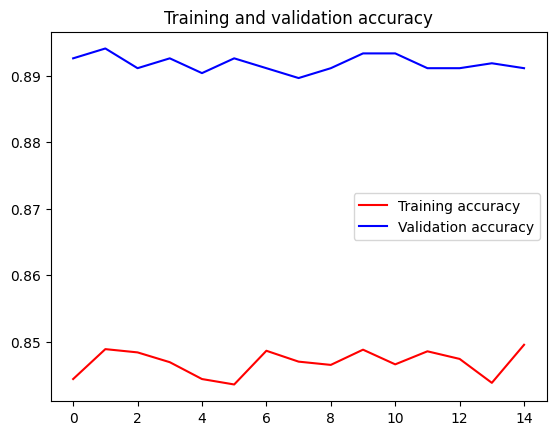

<Figure size 640x480 with 0 Axes>

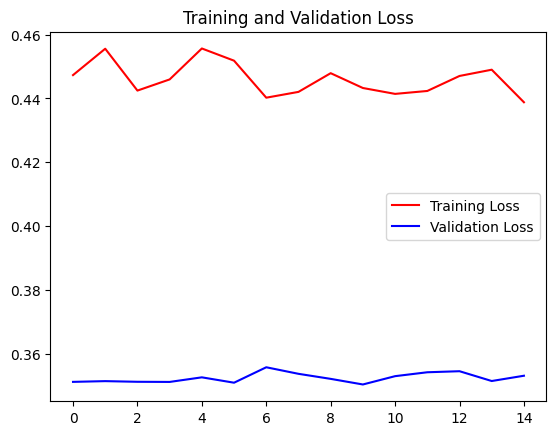

<Figure size 640x480 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")

 7/56 [==>...........................] - ETA: 11s - loss: 0.3135 - accuracy: 0.9200

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


56/56 [==============================] - 21s 210ms/step - loss: 0.3492 - accuracy: 0.8970
Validation loss: 0.3492
Validation accuracy: 0.8970


In [ ]:
model.save('/content/Capstone_ModelV2_5.h5')

In [ ]:
model.save('My_Model')

In [ ]:
!zip -r /content/drive/MyDrive/model_capstonev2.zip /content/My_Model

  adding: content/My_Model/ (stored 0%)
  adding: content/My_Model/keras_metadata.pb (deflated 96%)
  adding: content/My_Model/assets/ (stored 0%)
  adding: content/My_Model/fingerprint.pb (stored 0%)
  adding: content/My_Model/variables/ (stored 0%)
  adding: content/My_Model/variables/variables.index (deflated 78%)
  adding: content/My_Model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/My_Model/saved_model.pb (deflated 92%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : baterai
1 : botol air
2 : cap
3 : carrier bag
4 : cooking set hike
5 : first aid kit
6 : flashlight
7 : gelas plastik
8 : hat
9 : headlamp climbing
10 : jaket
11 : knife
12 : lampu tenda
13 : matras camping
14 : outdoor sandals
15 : portable gas
16 : portable stove
17 : powerbank
18 : raincoat
19 : sarung tangan
20 : shoes
21 : sleeping bag
22 : socks
23 : t-shirt
24 : tent bag
25 : towel
26 : trash bag
27 : trekking pole
28 : trousers


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab import files
TESTDI = uploaded=files.upload()
IMG_SIZE = 256


Saving first aid kit.jpg to first aid kit (1).jpg
Saving gelas.png to gelas (1).png
Saving gunting.jpg to gunting.jpg
Saving headlamp.jpg to headlamp (1).jpg
Saving knife.jpg to knife (1).jpg
Saving lampu tenda.jpg to lampu tenda (1).jpg
Saving outdoorssandals25.jpeg to outdoorssandals25 (1).jpeg
Saving outdoorssandals26.jpeg to outdoorssandals26 (1).jpeg
Saving outdoorssandals27.jpeg to outdoorssandals27 (1).jpeg
Saving sandal.jpg to sandal (1).jpg
Saving shoes.jpg to shoes (1).jpg
Saving shoes1.jpg to shoes1 (1).jpg
Saving shoes2.jpg to shoes2 (1).jpg
Saving shoes3.jpg to shoes3 (1).jpg
Saving trash bag.jpg to trash bag (1).jpg


In [ ]:
for her in TESTDI:
    pathi='/content/'+ her
    img=load_img(pathi, target_size=(256, 256))
    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_label = labels[np.argmax(classes[0])]
    print(f"file {pathi} adalah {predicted_label} ")
    
  


1/1 [==============================] - 0s 36ms/step
file /content/first aid kit.jpg adalah first aid kit 
1/1 [==============================] - 0s 40ms/step
file /content/gelas.png adalah gelas plastik 
1/1 [==============================] - 0s 35ms/step
file /content/gunting.jpg adalah knife 
1/1 [==============================] - 0s 34ms/step
file /content/headlamp.jpg adalah headlamp climbing 
1/1 [==============================] - 0s 35ms/step
file /content/knife.jpg adalah knife 
1/1 [==============================] - 0s 22ms/step
file /content/lampu tenda.jpg adalah lampu tenda 
1/1 [==============================] - 0s 22ms/step
file /content/outdoorssandals25.jpeg adalah outdoor sandals 
1/1 [==============================] - 0s 24ms/step
file /content/outdoorssandals26.jpeg adalah outdoor sandals 
1/1 [==============================] - 0s 23ms/step
file /content/outdoorssandals27.jpeg adalah shoes 
1/1 [==============================] - 0s 24ms/step
file /content/sandal.jpg a

IndexError: ignored

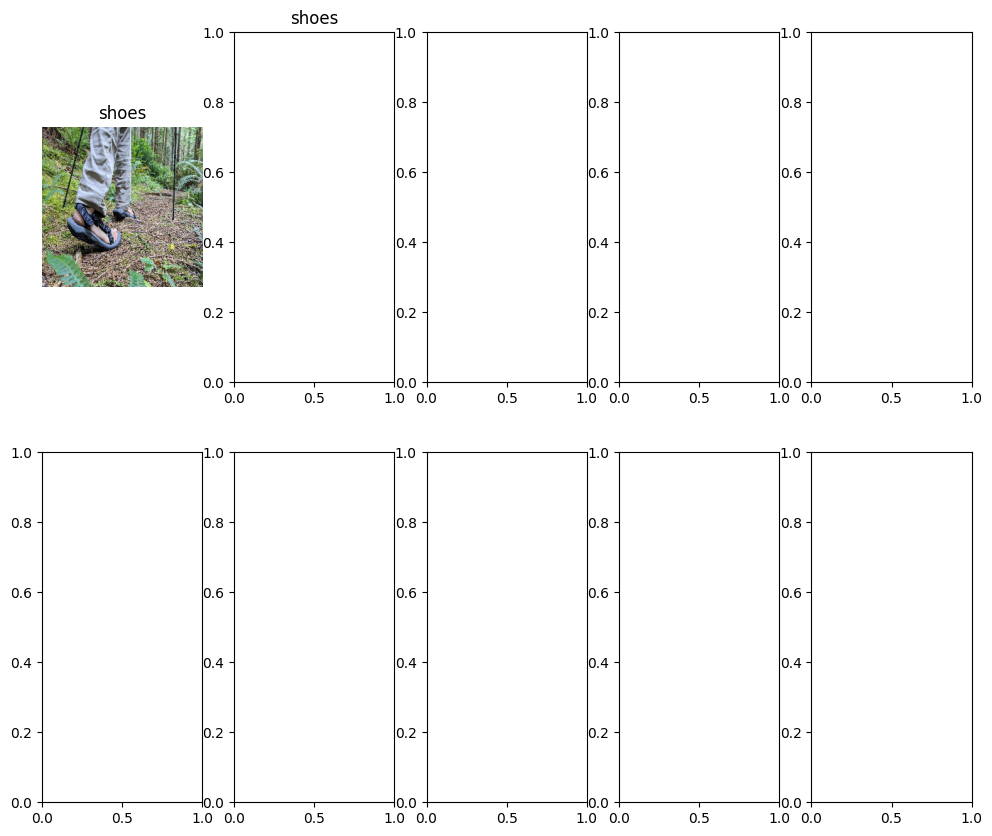

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):  
    for j in range(5):
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(images[j])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
filesi=os.listdir(source_path_flashlight)

# Load InceptionV3 Saved Model

In [ ]:
# layer.trainable=True
# location drive/u/2
!gdown 1hp4pS3W4RbIR_H9OBNVz6nHB8Iz1GXL5

Downloading...
From: https://drive.google.com/uc?id=1hp4pS3W4RbIR_H9OBNVz6nHB8Iz1GXL5
To: /content/Capstone_Model.h5
100% 1.96G/1.96G [00:45<00:00, 42.7MB/s]


In [ ]:
# layer.trainable=False
!gdown 1jrBy-GF-vsVuCcT9q8U9p0W9IfKNtja5

Downloading...
From: https://drive.google.com/uc?id=1jrBy-GF-vsVuCcT9q8U9p0W9IfKNtja5
To: /content/Capstone_Model.h5
100% 1.89G/1.89G [00:31<00:00, 60.7MB/s]


In [ ]:
# layer.trainable = False with new combination layer
!gdown 13HsTYnHr7Fw4CuUOcrc7NfpsWi6orZlI

Downloading...
From: https://drive.google.com/uc?id=13HsTYnHr7Fw4CuUOcrc7NfpsWi6orZlI
To: /content/Capstone_Model.h5
100% 40.4M/40.4M [00:00<00:00, 73.9MB/s]


In [ ]:
# model2 ver 2
# !gdown 17ZhmQ8aByco8teS49OdrqIrZEV8hezcT

# model ver 2.1
# !gdown 1PDkMWyJUfZ3PGaheXiMVaApLNnoKIKVQ

# model ver 2.2
# !gdown 1P1cAdEMi0w5pZPL4zTEAXlaQx5PHfqYB

# model vcer 2.3
!gdown 1IBC2vIF9gxGlX1CmY68QP5tzpix7ROuw

Downloading...
From: https://drive.google.com/uc?id=1IBC2vIF9gxGlX1CmY68QP5tzpix7ROuw
To: /content/Capstone_ModelV2_3.h5
100% 59.0M/59.0M [00:01<00:00, 45.8MB/s]


In [ ]:
model_path = '/content/Capstone_ModelV2_3.h5'

In [ ]:
loaded_model = tf.keras.models.load_model(model_path)

In [ ]:
loaded_model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [ ]:
history = loaded_model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    validation_steps=int(0.15*len(validation_generator)),
                    callbacks= [my_callback],
                    class_weight=weight)

Epoch 1/10
106/492 [=====>........................] - ETA: 3:30 - loss: 0.8846 - accuracy: 0.7460

In [ ]:
loaded_model.save('/content/drive/MyDrive/Capstone_Modelv3.h5')

In [ ]:
loaded_modelmodel.evaluate(train_generator)

 25/492 [>.............................] - ETA: 3:49 - loss: 0.1773 - accuracy: 0.9488

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


492/492 [==============================] - 270s 531ms/step - loss: 0.1386 - accuracy: 0.9583


[0.13862411677837372, 0.9582892656326294]

In [ ]:
loaded_model.evaluate(validation_generator)

55/55 [==============================] - 13s 234ms/step - loss: 0.1067 - accuracy: 0.9672


[0.10669269412755966, 0.9671533107757568]

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : baterai
1 : botol air
2 : cap
3 : carrier bag
4 : cooking set hike
5 : first aid kit
6 : flashlight
7 : gelas plastik
8 : hat
9 : headlamp climbing
10 : jaket
11 : knife
12 : lampu tenda
13 : matras camping
14 : outdoor sandals
15 : portable gas
16 : portable stove
17 : powerbank
18 : raincoat
19 : sarung tangan
20 : shoes
21 : sleeping bag
22 : socks
23 : t-shirt
24 : tent bag
25 : towel
26 : trash bag
27 : trekking pole
28 : trousers


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab import files
TESTDI = uploaded=files.upload()
IMG_SIZE = 256

Saving first aid kit.jpg to first aid kit.jpg
Saving gelas.png to gelas.png
Saving headlamp.jpg to headlamp.jpg
Saving knife.jpg to knife.jpg
Saving lampu tenda.jpg to lampu tenda.jpg
Saving trash bag.jpg to trash bag.jpg


In [ ]:
for her in TESTDI:
    pathi='/content/'+ her
    img=load_img(pathi, target_size=(256, 256))
    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = loaded_model.predict(images, batch_size=10)
    predicted_label = labels[np.argmax(classes[0])]
    print(f"file {pathi} adalah {predicted_label} ")

1/1 [==============================] - 0s 44ms/step
file /content/first aid kit.jpg adalah first aid kit 
1/1 [==============================] - 0s 41ms/step
file /content/gelas.png adalah gelas plastik 
1/1 [==============================] - 0s 52ms/step
file /content/headlamp.jpg adalah headlamp climbing 
1/1 [==============================] - 0s 45ms/step
file /content/knife.jpg adalah knife 
1/1 [==============================] - 0s 47ms/step
file /content/lampu tenda.jpg adalah lampu tenda 
1/1 [==============================] - 0s 43ms/step
file /content/trash bag.jpg adalah trash bag 
